In [2]:
!pip install --upgrade tensorflow

     -------------------------------------- 266.3/266.3 MB 7.4 MB/s eta 0:00:00
     ---------------------------------------- 126.5/126.5 kB ? eta 0:00:00
     ------------------------------------- 895.9/895.9 kB 55.4 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 33.9 MB/s eta 0:00:00
     ------------------------------------- 439.2/439.2 kB 26.8 MB/s eta 0:00:00
     --------------------------------------- 23.2/23.2 MB 40.9 MB/s eta 0:00:00
     ---------------------------------------- 6.0/6.0 MB 47.9 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 54.0 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB ? eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 47.6 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 3.0 MB/s eta 0:00:00
     ------------------------------------- 177.2/177.2 kB 11.1 MB/s eta 0:00:00
     ------------------------------------- 781.3/781.3 k

In [33]:
#calling tensorflow 
import tensorflow as tf

mnist = tf.keras.datasets.mnist  #28X28 images of hand-written digits 0-9

#Split the data to train and test model
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

#Defining the model 
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

#Trainning the model
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train,y_train,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2624 - accuracy: 0.9229
Epoch 2/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1071 - accuracy: 0.9672
Epoch 3/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0721 - accuracy: 0.9769


In [34]:
#Evaluating the accuracy of the model
val_loss, val_acc = model.evaluate(x_test,y_test)
print(val_loss,val_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0832 - accuracy: 0.9739
0.08316598832607269 0.9739000201225281


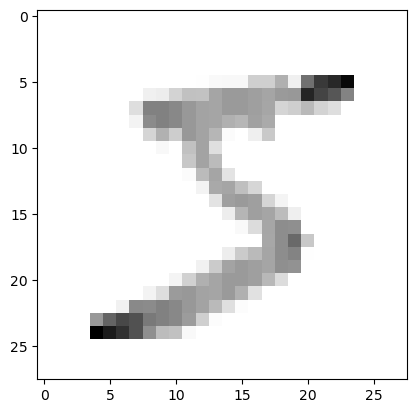

In [35]:
#visualize the data
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

#print(x_train[0])

In [36]:
#Saving the model with name
model.save('image_prediction.model')

INFO:tensorflow:Assets written to: image_prediction.model\assets


INFO:tensorflow:Assets written to: image_prediction.model\assets


In [37]:
#Using the model by calling it name
new_model = tf.keras.models.load_model('image_prediction.model')

In [38]:
#making predictions using model
predictions = new_model.predict([x_test])

313/313 [==============================] - 1s 3ms/step


In [39]:
print(predictions)

[[1.3220270e-09 1.8419462e-07 1.6236969e-04 ... 9.9934763e-01
  1.9393049e-07 2.6017240e-08]
 [5.0697132e-08 1.3032171e-03 9.9866116e-01 ... 2.1091708e-08
  6.9191088e-08 1.9569592e-11]
 [3.2721408e-07 9.9911755e-01 1.8578390e-05 ... 3.2218214e-04
  3.3372620e-04 1.4663662e-05]
 ...
 [8.0048640e-10 2.6254975e-07 2.0378694e-09 ... 9.6422526e-05
  2.9357343e-06 4.1214572e-04]
 [2.8823555e-09 1.9314348e-07 3.8232212e-10 ... 3.4149089e-08
  3.8672306e-04 1.6911537e-08]
 [1.0874038e-07 1.7573113e-07 1.2169453e-07 ... 2.0488747e-10
  3.1370874e-07 8.3791263e-10]]


In [46]:
import numpy as np

print(np.argmax(predictions[0]))

7


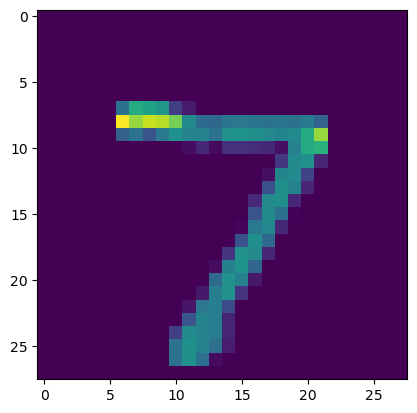

In [47]:
plt.imshow(x_test[0])